## Univariate Stationary Time Series Analysis AR:MA process

White noise time series properties:

$$ E[y_t] = 0$$ 
$$ var[y_t] = \sigma^2 $$
$$ cov[y_t, y_j] = 0$$
$$ t = [1,2 ... T]$$

There is no association between $y_t$ values here hence we have constant varaince and $\mu = 0$ 

The series y, would consist of realised random fluctuations around zero, each fluctuation being uncorrelated from the last due to the covariance between observations being zero.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import statsmodels.tsa.ar_model

<Axes: title={'center': 'Random White Noise Series'}>

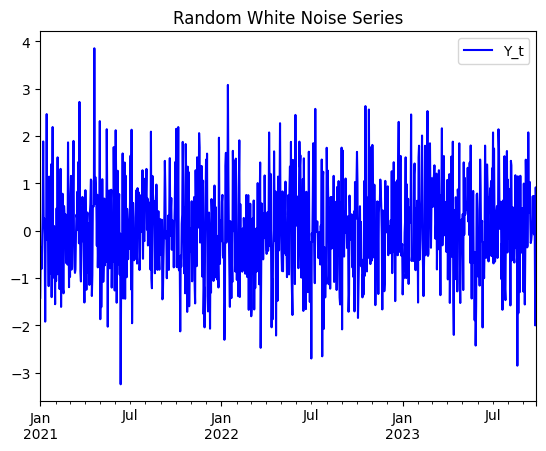

In [34]:
rand_numbers = np.random.randn(1000)
dates = pd.date_range("2021-01-01", periods = len(rand_numbers), freq = 'D')
columns = ['Y_t']
pd.DataFrame(rand_numbers, index = dates, columns=columns).plot(title = 'Random White Noise Series', color = 'b')

The distribution is **unconditional on its past** so: 

KEY: $$ f(y_t | I_{t-1}) = f(y_t)$$

where $ I_{t-1} = {y_1, y_2...y_{t-1}}$

We want the error terms to be white noise (Gaussian) when using OLS.

Therefore: $$ \varepsilon _t \sim WN(0,\sigma^2)$$


## Autoregressive Processes

A function of **past observations** and **white noise**

Now suppose $$ f(y_t | y_{t-1}, y_{t-2}....) \neq f(y_t)$$

Here the distribution IS conditional on a finite number of past values of $y_t$ and is clearly not white noise. We now have a different process to a white noise series.

We assume:

1) The conditional mean of y_t is a linear function of past values
2) Constant conditional variance for y_t
3) Shock to this process $\varepsilon_t$ are white noise
4) unconditional mean of y_t is zero

p = denotes observation 'p' periods

Autoregressive process AR(p) model can be written as : $$y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t$$

where $y_t$ is the dependent variable at time t, $\phi_i$ is the coefficient that describes the influence of past values, $y_{t-i}$ is the lagged values of $y_t$ , and $\varepsilon$ is the error term or white noise.

Through information derived by repeated substitution we find that an Autoregressive Process can be rewritten in the form of: $$y_t = \phi_1^t y_0 + \sum_{i=0}^{t-1} \phi_i^i \varepsilon_{t-i}$$

From this we learn that yt 1) is a function of the very first time series yt 2) and the sum of all past shocks

Notice that for AR coefficients that are less than one, this means that for every period the shock $\varepsilon$ becomes less impactful/ has a diminishing impact as the square of a decimal < 1 becomes exponentially smaller.

A shock will have a permanent impact if the AR coefficient $$\phi = 1$$

A shock will have an increasing impact as periods pass if the AR(autoregressive) coefficient is greater than 1 $\phi > 1$

KEY:

1) $\phi < 1$ diminishing impact, we say the time series is **mean reverting**
2) $\phi = 1$ shocks have a permanent impact, the time series is a **random walk**
3) $\phi > 1$ shocks have an increasing impact, this is an **explosive** time series.

Lets plot these:

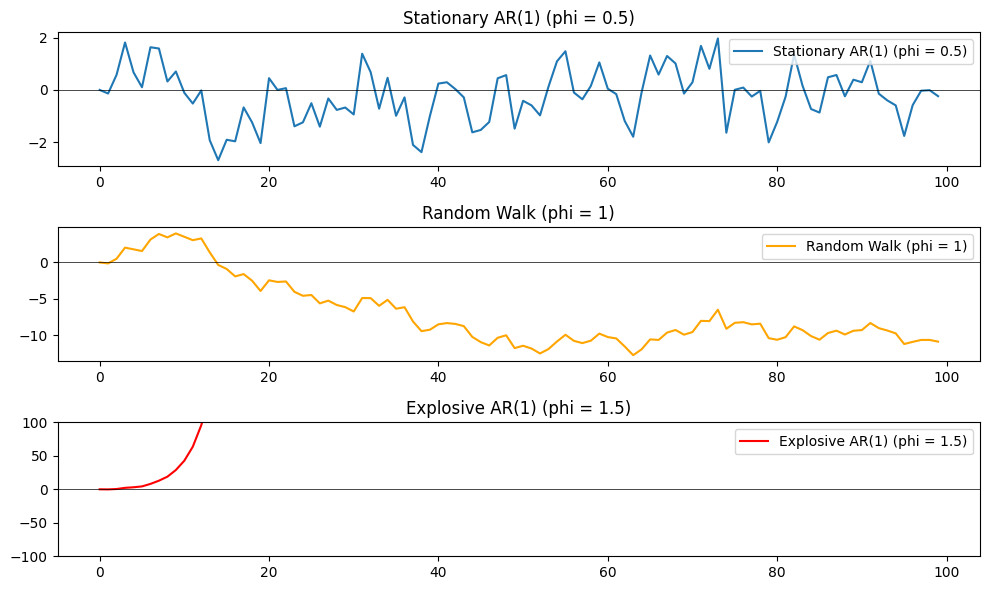

In [35]:
np.random.seed(42)

n = 100 # number of time periods

# Generate white noise (errors)
epsilon = np.random.normal(0,1, size = n) 

# Stationary AR(1) process with AR coefficient less than 1 (Phi = 0.5)

phi_stationary = 0.5
y_stationary = np.zeros(n)

for t in range(1,n):
    y_stationary[t] = phi_stationary * y_stationary[t-1] + epsilon[t]


# Random Walk (AR(1) process with Phi = 1)

phi_rw = 1
y_rw = np.zeros(n)

for t in range(1,n):
    y_rw[t] = phi_rw * y_rw[t-1] + epsilon[t]


# Explosive AR(1) with AR coefficient greater than 1 (Phi = 1.5)
phi_explosive = 1.5

y_explosive = np.zeros(n)

for t in range(1,n):
    y_explosive[t] = phi_explosive * y_explosive[t-1] + epsilon[t]


# To plot these three time series

plt.figure(figsize = (10,6))

plt.subplot(3,1,1)
plt.plot(y_stationary, label = 'Stationary AR(1) (phi = 0.5)')
plt.title('Stationary AR(1) (phi = 0.5)')
plt.axhline(0, color='black', linewidth = 0.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(y_rw, label = 'Random Walk (phi = 1)', color = 'orange')
plt.title('Random Walk (phi = 1)')
plt.axhline(0, color='black', linewidth = 0.5)
plt.legend()

plt.subplot(3,1,3)
plt.plot(y_explosive, label = 'Explosive AR(1) (phi = 1.5)' , color = 'red')
plt.title('Explosive AR(1) (phi = 1.5)')
plt.axhline(0, color='black', linewidth = 0.5)
plt.ylim([-100, 100]) 
plt.legend()

plt.tight_layout()
plt.show()



    

## Orders of integration

Considering a random walk  when we difference the random walk model once for a random walk AR(1) model we have found a representation that shocks will only have transitory effects.

A transitory effect is a temporary effect.

We say that it takes d differences such that the shock to the series only has transitory effects rather than permanent effects. The number of times we difference to make a series stationary is the order of integration.

Similar to linear algebra the roots are the values of the characteristic polynomial which satisfy the characteristic polynomial equalling zero and being sationary.

## Moving Average Processes

Moving Average processes are a **function of past shocks**.

Rather than a AutoRegressive model which is a function of previous observations + white noise.

Starting with the finite version of the moving average model: $$y_t = \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q}$$

By repeated substitution we find: $$y_t = \varepsilon_t + \sum_{i=1}^{t-1} (-1)^{i-1} \theta_1^i y_{t-i}$$


The key take away is that unlike in the AR case, in the MA case y_t is a function of the sum of ALL past values of y_t

The shock dies out after one period REGARDLESS of the value of the MA coefficient. All MA processes are mean reverting. Therefore MA processes are stationary. An increase in Theta the MA coefficient only increases the noise the series has for one period.

Let's plot a MA model.

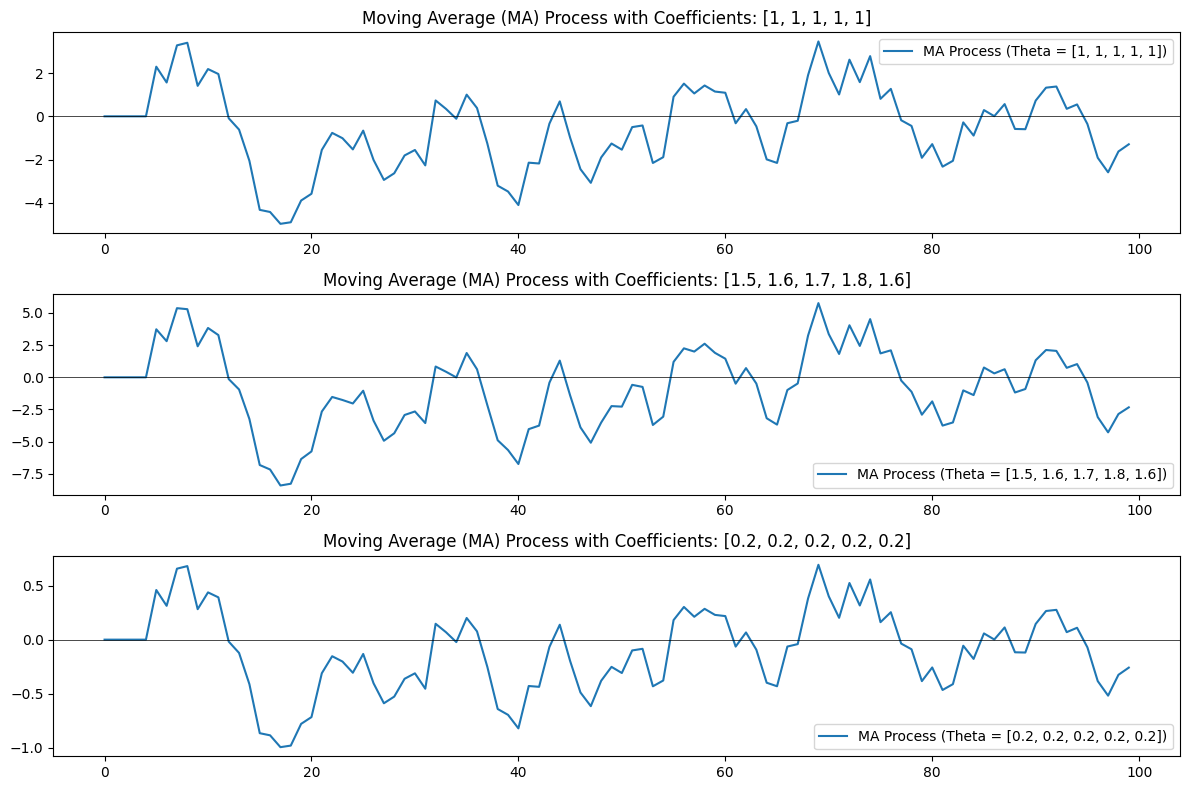

In [36]:
# Plot a MA(Q) process

np.random.seed(42)

n = 100 # number of time periods
q = 5 # Order of the MA process (past q error terms)

#Generate white noise
epsilon = np.random.normal(0,1,size = n)

# Fn() to generate an MA process with specific coefficients
def generate_ma_process(theta, epsilon, q):
    y = np.zeros(n)
    for t in range(q,n):
        y[t] = sum(theta[i] * epsilon[t-i-1] for i in range(q))
    return y

theta_sets = [
    [1, 1, 1, 1, 1],
    [1.5, 1.6, 1.7, 1.8, 1.6],    # Second set of coefficients
    [0.2, 0.2, 0.2, 0.2, 0.2]  # Third set of coefficients
]

plt.figure(figsize=(12, 8))

for i, theta in enumerate(theta_sets, start = 1):
    y_ma = generate_ma_process(theta, epsilon, q)

    plt.subplot(3,1,i)
    plt.plot(y_ma, label=f'MA Process (Theta = {theta})')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.title(f'Moving Average (MA) Process with Coefficients: {theta}')
    plt.legend()

plt.tight_layout()
plt.show()


As we can see the moving average processes are mean reverting and increasing theta values only increases noise the series has for each period.

## Model intercepts

We have excluded an intercept in our models so far.

Excluding an intercept is only valid if we **know** that the unconditional mean of a series is equal to zero. i.e $ \mu = 0$

Else we must include a intercept in our model otherwise coefficients become biased. 

$\alpha $ = AR model intercept
$\mu $ = MA model intercept